In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('nba.csv')
df.head()
# df.info()
# df.describe()
df.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [11]:
df.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [38]:
df['College'] = df['College'].astype('category')
df['Position'] = df['Position'].astype('category')
df['Team'] = df['Team'].astype('category')

In [39]:
df.dtypes

Name          object
Team        category
Number         int64
Position    category
Age            int64
Height       float64
Weight         int64
College     category
Salary         int64
dtype: object

<Axes: xlabel='None', ylabel='None'>

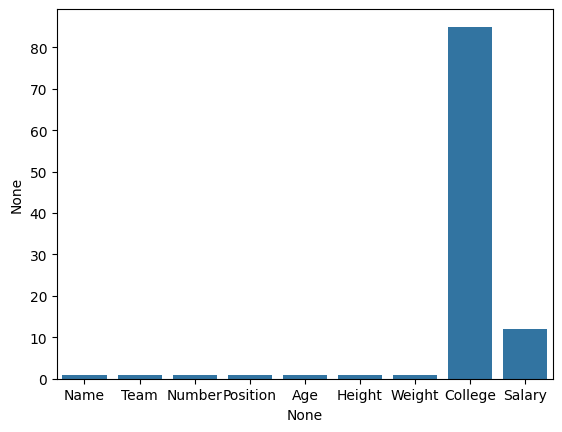

In [20]:
miss = df.isnull().sum()
# miss = miss[miss > 0]
sns.barplot(x=df.columns , y=miss)

In [21]:
df['Height'] = pd.to_numeric(df['Height'].str.replace("-","") , errors='coerce')

In [29]:
df['Age'] = pd.to_numeric(df['Age'],errors='coerce').fillna(0).astype(int)
df['Number'] = pd.to_numeric(df['Number'],errors='coerce').fillna(0).astype(int)
df['Weight'] = pd.to_numeric(df['Weight'],errors='coerce').fillna(0).astype(int)
df['Salary'] = pd.to_numeric(df['Salary'],errors='coerce').fillna(0).astype(int)
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,62.0,180,Texas,7730337
1,Jae Crowder,Boston Celtics,99,SF,25,66.0,235,Marquette,6796117
2,John Holland,Boston Celtics,30,SG,27,65.0,205,Boston University,0
3,R.J. Hunter,Boston Celtics,28,SG,22,65.0,185,Georgia State,1148640
4,Jonas Jerebko,Boston Celtics,8,PF,29,610.0,231,NaN,5000000


In [37]:
df.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [36]:
df['College'] = df['College'].fillna(df['College'].mode()[0])
df.dropna(inplace=True)

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Team_k'] = le.fit_transform(df['Team'])
df['Position_k'] = le.fit_transform(df['Position'])
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Team_k,Position_k
0,Avery Bradley,Boston Celtics,0,PG,25,62.0,180,Texas,7730337,1,2
1,Jae Crowder,Boston Celtics,99,SF,25,66.0,235,Marquette,6796117,1,3
2,John Holland,Boston Celtics,30,SG,27,65.0,205,Boston University,0,1,4
3,R.J. Hunter,Boston Celtics,28,SG,22,65.0,185,Georgia State,1148640,1,4
4,Jonas Jerebko,Boston Celtics,8,PF,29,610.0,231,Kentucky,5000000,1,1


In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Team_k'] = le.fit_transform(df['Team'])
df['Position_k'] = le.fit_transform(df['Position'])
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Team_k,Position_k
0,Avery Bradley,Boston Celtics,0,PG,25,62.0,180,Texas,7730337,1,2
1,Jae Crowder,Boston Celtics,99,SF,25,66.0,235,Marquette,6796117,1,3
2,John Holland,Boston Celtics,30,SG,27,65.0,205,Boston University,0,1,4
3,R.J. Hunter,Boston Celtics,28,SG,22,65.0,185,Georgia State,1148640,1,4
4,Jonas Jerebko,Boston Celtics,8,PF,29,610.0,231,Kentucky,5000000,1,1


In [49]:
data_en = pd.get_dummies(df , columns = ['Team_k','Position_k'])
data_en.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Team_k_0,...,Team_k_25,Team_k_26,Team_k_27,Team_k_28,Team_k_29,Position_k_0,Position_k_1,Position_k_2,Position_k_3,Position_k_4
0,Avery Bradley,Boston Celtics,0,PG,25,62.0,180,Texas,7730337,False,...,False,False,False,False,False,False,False,True,False,False
1,Jae Crowder,Boston Celtics,99,SF,25,66.0,235,Marquette,6796117,False,...,False,False,False,False,False,False,False,False,True,False
2,John Holland,Boston Celtics,30,SG,27,65.0,205,Boston University,0,False,...,False,False,False,False,False,False,False,False,False,True
3,R.J. Hunter,Boston Celtics,28,SG,22,65.0,185,Georgia State,1148640,False,...,False,False,False,False,False,False,False,False,False,True
4,Jonas Jerebko,Boston Celtics,8,PF,29,610.0,231,Kentucky,5000000,False,...,False,False,False,False,False,False,True,False,False,False


In [54]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df[['Number','Weight']] = ss.fit_transform(df[['Number','Weight']])
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Team_k,Position_k
0,Avery Bradley,Boston Celtics,-1.108456,PG,25,62.0,-1.576454,Texas,7730337,1,2
1,Jae Crowder,Boston Celtics,5.098980,SF,25,66.0,0.511666,Marquette,6796117,1,3
2,John Holland,Boston Celtics,0.772585,SG,27,65.0,-0.627308,Boston University,0,1,4
3,R.J. Hunter,Boston Celtics,0.647183,SG,22,65.0,-1.386625,Georgia State,1148640,1,4
4,Jonas Jerebko,Boston Celtics,-0.606845,PF,29,610.0,0.359803,Kentucky,5000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,1.462300,PF,20,610.0,0.473701,Kentucky,2239800,28,1
453,Shelvin Mack,Utah Jazz,-0.606845,PG,26,63.0,-0.703240,Butler,2433333,28,2
454,Raul Neto,Utah Jazz,0.459078,PG,24,61.0,-1.614420,Kentucky,900000,28,2
455,Tibor Pleiss,Utah Jazz,0.208273,C,26,73.0,1.308949,Kentucky,2900000,28,0


In [59]:
df = pd.read_csv("./datasets/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [61]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [64]:
from sklearn.model_selection import train_test_split

X = df[['sepal_length','sepal_width','petal_length','petal_width']]
Y = df['species']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

obj = GaussianNB()
obj.fit(X_train , Y_train)
y_pred = obj.predict(X_test)

In [70]:
accuracy = accuracy_score(Y_test , y_pred)
report = classification_report(Y_test , y_pred)
accuracy


0.9555555555555556

In [72]:
print("Classification report :", report)

Classification report :               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.88      0.94        17
   virginica       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [75]:
cm = confusion_matrix(Y_test , y_pred)
cm

array([[17,  0,  0],
       [ 0, 15,  2],
       [ 0,  0, 11]])

In [87]:
def cal_metrics(cm):
    classes = cm.shape[0]
    metric = {}

    for i in range(classes):
        TP = cm[i,i]
        FP = cm[:,i].sum() - TP
        FN = cm[i,:].sum() - TP
        TN = cm.sum() - (TP + FP + FN)

        metric[i] = {"TP" : TP,"FP" : FP , "FN" : FN , "TN" : TN}
    return metric    

metric = cal_metrics(cm)    

for i,j in metric.items():
    print("Class :",i)
    print("TP : ",j['TP'])
    print("FP : ",j['FP'])
    print("FN : ",j['FN'])
    print("TN : ",j['TN'])
    print()

Class : 0
TP :  17
FP :  0
FN :  0
TN :  28

Class : 1
TP :  15
FP :  0
FN :  2
TN :  28

Class : 2
TP :  11
FP :  2
FN :  0
TN :  32

